https://vasanth16.github.io

# Comparing Tourist Preferences in Asia and Europe

Sam Childs and Vasanth Rajasekaran

## Introduction
Vasanth and I will be working together on the final tutorial for this class. We have identified a dataset from UC Irvine which includes review data from travelers on Google Reviews. It is called “Travel Review Rating Dataset”, and it is found in the university’s Machine Learning Repository. We are interested in asking questions about whether average user feedback for a specific type of attraction yields insights into other kinds of attractions. Perhaps certain attraction classes have overlapping sets of fans, or perhaps another attraction class is highly polarizing. We are also wondering about frequency of reviews by attraction class. Perhaps few people who enjoy attraction type A try attraction type B, but the few that do really enjoy the experience. Insights into how markets for travel entertainment clear inefficiently would be of great value to tourism boards

## Initial Questions 
1. Does one's affinity for certain attraction types yield certain affinity for others?
2. How does tourist affinity differ between Asia and Europe?
3. Can we predict how much a user will like a certain type of attraction based on their other reviews?

## Collaboration Plan
To facilitate collaboration, Vasanth and I have set up a private Github repository to share workbooks and data. We will ensure that each commit to the Git repo will include thorough comments documenting the changes. We will meet over the phone weekly to update each other on our progress, or more frequently as necessary to facilitate deadlines. Included in these meetings will be discussions about how to resolve merges/conflicts as they arise during our work.

## Loading and Cleaning Data
### Google Reviews

Link to dataset: https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#The names list for the data set that is given on the data source website 
googleColumns=[ 'Unique user id '
,'Average ratings on churches' 
,'Average ratings on resorts' 
,'Average ratings on beaches' 
,'Average ratings on parks' 
,'Average ratings on theatres' 
,'Average ratings on museums' 
,'Average ratings on malls' 
,'Average ratings on zoo' 
,'Average ratings on restaurants' 
,'Average ratings on pubs/bars' 
,'Average ratings on local services' 
,'Average ratings on burger/pizza shops' 
,'Average ratings on hotels/other lodgings' 
,'Average ratings on juice bars'
,'Average ratings on art galleries' 
,'Average ratings on dance clubs' 
,'Average ratings on swimming pools' 
,'Average ratings on gyms' 
,'Average ratings on bakeries' 
,'Average ratings on beauty & spas' 
,'Average ratings on cafes' 
,'Average ratings on view points' 
,'Average ratings on monuments' 
,'Average ratings on gardens']

In [8]:
googleData = pd.read_csv('./data/google_review_ratings.csv', header = 0, names=googleColumns, index_col=False) 
# reads ratings CSV into pandas using header 0 and names from the list above
googleData = googleData.set_index('Unique user id ') # sets USER ID Column to index
googleData = googleData.drop('Average ratings on local services',axis=1) # This column is corrupted and we decided to remove since it was not important to our analysis
googleData # shows dataframe

,Average ratings on churches,Average ratings on resorts,Average ratings on beaches,Average ratings on parks,Average ratings on theatres,Average ratings on museums,Average ratings on malls,Average ratings on zoo,Average ratings on restaurants,Average ratings on pubs/bars,...,Average ratings on art galleries,Average ratings on dance clubs,Average ratings on swimming pools,Average ratings on gyms,Average ratings on bakeries,Average ratings on beauty & spas,Average ratings on cafes,Average ratings on view points,Average ratings on monuments,Average ratings on gardens
Unique user id,,,,,,,,,,,,,,,,,,,,,
User 1,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 2,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.64,2.33,2.65,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 3,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 4,0.00,0.50,3.63,3.63,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
User 5,0.00,0.00,3.63,3.63,5.00,2.92,5.00,2.64,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.00,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
User 5452,0.91,5.00,4.00,2.79,2.77,2.57,2.43,1.09,1.77,1.04,...,5.00,0.66,0.65,0.66,0.69,5.00,1.05,5.0,5.0,1.56
User 5453,0.93,5.00,4.02,2.79,2.78,2.57,1.77,1.07,1.76,1.02,...,0.89,0.65,0.64,0.65,1.59,1.62,1.06,5.0,5.0,1.09
User 5454,0.94,5.00,4.03,2.80,2.78,2.57,1.75,1.05,1.75,1.00,...,0.87,0.65,0.63,0.64,0.74,5.00,1.07,5.0,5.0,1.11


#### Cleaning Google reviews data 

The travel data set was a relatively simple to import and format correctly. The first step was to define the column names as per the UCI ML website, there is a large list of names at the top. The second step was to read the csv using pandas. For this we set the heading to zero to cut out a row of vauge names (category 1, category, etc.) that come with the data set. We also had to set the index_col to false inorder to make the columns line up with the data. The data is now indexed correctly by user with specific categories for names.

### Tripadvisor Data 

We found an additional dataset that looked at average reviews on various categories from travelers in Asia. Although not all of the attributes match between the datasets, we do have some overlapping that will allow for some comparisons. Important to note: The ratings on trip advisor are 0-4 rather than the 1-5 found on the google data (however, we change the values to match later)

Link: https://archive.ics.uci.edu/ml/datasets/Travel+Reviews?fbclid=IwAR3EA8OhRIyMH6iFhOiUWh4OzYQ48MSfXHrW6pwAz1_xXdeWKRTBt6aab3Y

In [9]:
TAColumns = [
    'Unique user id',
    'Average ratings on art galleries',
    'Average ratings on dance clubs',
    'Average ratings on juice bars',
    'Average ratings on restaurants',
    'Average ratings on museums',
    'Average ratings on resorts',
    'Average ratings on parks',
    'Average ratings on beaches',
    'Average ratings on theatres',
    'Average ratings on religious institutions'
]

TAData  = pd.read_csv('./data/tripadvisor_review.csv', header=0, names=TAColumns)
TAData = TAData.set_index('Unique user id')
TAData

,Average ratings on art galleries,Average ratings on dance clubs,Average ratings on juice bars,Average ratings on restaurants,Average ratings on museums,Average ratings on resorts,Average ratings on parks,Average ratings on beaches,Average ratings on theatres,Average ratings on religious institutions
Unique user id,,,,,,,,,,
User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...
User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02


#### Cleaning our Tripadvisor Data:

The travel data set was also relatively simple to import and format correctly. The first step was to define the column names as per the UCI ML website, there is a large list of names at the top. The second step was to read the csv using pandas. For this we set the heading to zero to cut out a row of vauge names (category 1, category, etc.) that come with the data set. We also had to set the index_col to false inorder to make the columns line up with the data. The data is now indexed correctly by user with specific categories for names. (Note that these unique user ID's are not the same users as the other data set even though many values will appear in both the data sets).

## Exploring our Datasets
For exploring our data, we decided to first check some measures of central tendency to better understand what attraction types were popular from a high level.

First we looked at the data from Asia (Tripadvisor) and created a chart to show the differences between the different categories 

Average ratings on parks                     3.180939
Average ratings on beaches                   2.835061
Average ratings on religious institutions    2.799224
Average ratings on resorts                   1.842898
Average ratings on theatres                  1.569439
Average ratings on dance clubs               1.352612
Average ratings on juice bars                1.013306
Average ratings on museums                   0.939735
Average ratings on art galleries             0.893194
Average ratings on restaurants               0.532500
dtype: float64


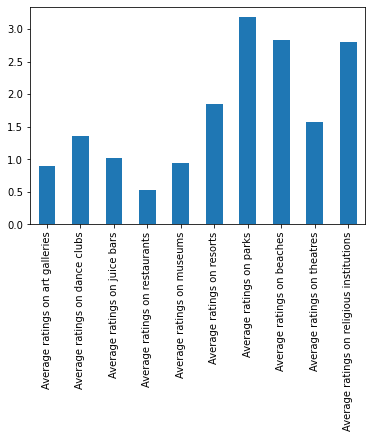

In [10]:
# Rank the categories by highest average:
TAAvg = TAData.mean(axis=0)
print(TAAvg.sort_values(ascending = False))
TAAvg.plot.bar()

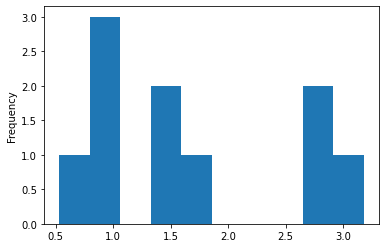

In [7]:
TAAvg.plot.hist()

Here we have a simple look at the average rating per attraction type from the Asia travelers (TripAdvisor) data. We see that no type averages at 4.0 (Max rating) and that there are no types averaging a rating between 2.0-2.5 from the histogram. 

In [8]:
# Rank the categories by highest average:
avg = googleData.mean(axis = 0)
print(avg.sort_values(ascending = False))

Average ratings on malls                    3.351395
Average ratings on restaurants              3.126019
Average ratings on theatres                 2.958941
Average ratings on museums                  2.893490
Average ratings on pubs/bars                2.832729
Average ratings on parks                    2.796886
Average ratings on zoo                      2.540795
Average ratings on beaches                  2.489331
Average ratings on resorts                  2.319707
Average ratings on art galleries            2.206573
Average ratings on juice bars               2.190861
Average ratings on hotels/other lodgings    2.125511
Average ratings on burger/pizza shops       2.078339
Average ratings on view points              1.750537
Average ratings on gardens                  1.560755
Average ratings on monuments                1.531453
Average ratings on churches                 1.455720
Average ratings on dance clubs              1.192801
Average ratings on beauty & spas            1.

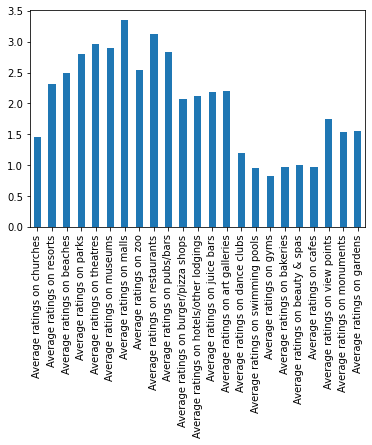

In [9]:
avg.plot.bar() # We see there been a steady distribution across all rating lavels 

In the preceeding tables and graphs we investigated the average ratings per category in the EU travelers data (Google). This data has much more attaction types than the Asia data and thus we see averages across the entire range of 0-3.5. 

In [11]:
# Figure out the ratio of reviews above and below 2 (2 is a rating of average). It seems like tourists in asia only like beaches and religious sites...
for col in newColumns[1:]:
    #print(col)
    mask = (TAData[col] > 2) 
    print(mask.value_counts())

False    970
True      10
Name: Average ratings on art galleries, dtype: int64
False    910
True      70
Name: Average ratings on dance clubs, dtype: int64
False    837
True     143
Name: Average ratings on juice bars, dtype: int64
False    971
True       9
Name: Average ratings on restaurants, dtype: int64
False    965
True      15
Name: Average ratings on museums, dtype: int64
False    622
True     358
Name: Average ratings on resorts, dtype: int64
True    980
Name: Average ratings on parks, dtype: int64
True    980
Name: Average ratings on beaches, dtype: int64
False    867
True     113
Name: Average ratings on theatres, dtype: int64
True    980
Name: Average ratings on religious institutions, dtype: int64


This table shows the ratios of ratings above 2 per category. We chose 2 since it is considered an average rating for an attraction. We see that tourists in Asia seem to like resorts, parks, beaches, and religious sites across the board. Resturants satisfaction is high as well.

The graph below compares the average ratings between the EU and Asia data in their common categories. We see that things like resturants and juice bars are higher rated in Europe while parks and beaches are rated higher in Asia. There seems to be more of an affinity for the outdoors in Asia 

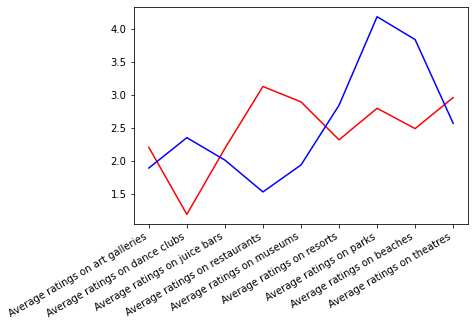

In [12]:
commonCategories =[
    'Average ratings on art galleries',
    'Average ratings on dance clubs',
    'Average ratings on juice bars',
    'Average ratings on restaurants',
    'Average ratings on museums',
    'Average ratings on resorts',
    'Average ratings on parks',
    'Average ratings on beaches',
    'Average ratings on theatres'
]
taCopy = TAData.copy()
taCopy[commonCategories] += 1 # add one to all TA data to make the scales of google and TA match 
a = googleData[commonCategories].mean()
b = taCopy[commonCategories].mean()

plt.figure(1)
plt.clf()
plt.plot(commonCategories,a, color = 'r', label='Google Data')
plt.plot(commonCategories,b, color = 'b', label='Trip Advisor Data')
plt.xticks(rotation= 30,ha="right")
plt.legend=True

The two heatmaps below show the cross tabulation for average ratings on restaurants vs juice bars in the google data set. Google's data set has a lot of users that had an average rating of 5 stars for both categories, so normalizing the table is important. This phenomena does not occur in the Trip Advisor dataset, which might have to do with the user base of each platform. Google's dataset is likely to have more casual users who leave reviews with their gmail accounts on a whim. Trip Advisor, on the other hand, requires the user to make a separate account which limits their user base to users who are serious about leaving reviews. This difference in user base likely explains the phenomena.

Average ratings on beaches,0.00,0.50,0.52,0.53,0.54,0.57,0.58,0.59,0.60,0.61,...,4.76,4.77,4.78,4.79,4.92,4.93,4.94,4.95,4.96,5.00
Average ratings on parks,,,,,,,,,,,,,,,,,,,,,
0.83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
0.86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
0.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,1.000000
4.94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.800000
4.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.5,0.000000,0.0,0.000000,0.000000,0.0,0.500000


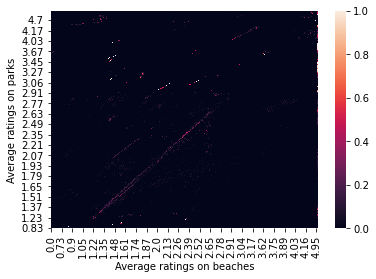

In [30]:
euResPubs = pd.crosstab(googleData['Average ratings on parks'],googleData['Average ratings on beaches'],normalize = 'index')
b = sns.heatmap(euResPubs)
b.invert_yaxis()
euResPubs

Average ratings on beaches,2.42,2.48,2.49,2.54,2.56,2.57,2.58,2.59,2.61,2.62,...,3.19,3.20,3.22,3.23,3.25,3.26,3.29,3.33,3.38,3.39
Average ratings on parks,,,,,,,,,,,,,,,,,,,,,
3.16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.17,0.000000,0.000000,0.006098,0.000000,0.006098,0.006098,0.006098,0.006098,0.012195,0.006098,...,0.012195,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.18,0.000000,0.001721,0.001721,0.006885,0.000000,0.003442,0.008606,0.003442,0.001721,0.010327,...,0.001721,0.005164,0.006885,0.001721,0.001721,0.001721,0.001721,0.001721,0.001721,0.001721
3.19,0.000000,0.000000,0.000000,0.017964,0.005988,0.005988,0.029940,0.000000,0.005988,0.023952,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.20,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018182,0.036364,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3.21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


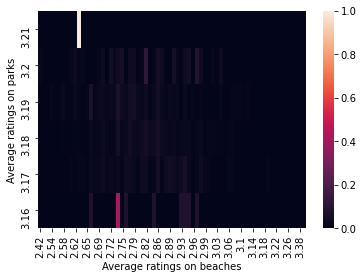

In [31]:
aResPubs = pd.crosstab(TAData['Average ratings on parks'],TAData['Average ratings on beaches'], normalize = 'index')
a = sns.heatmap(aResPubs)
a.invert_yaxis()
aResPubs

The Google dataset appears to have multiple distinct populations that each show a positive correlation between restaurant score and juice bar score (a simpson's paradox scenario) but this could always be a coincidence. Without other categorical labels in the dataset, we are unable to infer a clustering behavior. The Trip Advisor dataset does not show these trends.

In [32]:
TAData['Average ratings on parks'].corr(TAData['Average ratings on beaches'])

-0.07249175058986655

In [15]:
from sklearn.cluster import KMeans

In [25]:
googleData = googleData.fillna(0)
model = KMeans(n_clusters=5,random_state=0)
model.fit(googleData)
cluster = model.labels_
model.cluster_centers_
cluster

array([1, 1, 1, ..., 4, 3, 4], dtype=int32)

In [ ]:
for i in model.cluster_centers_:
    plt.scatter